
# Linear Regression: Custom vs Scikit-learn Comparison

In this notebook, we will compare the performance of a custom-built Linear Regression model from scratch 
against the standard `LinearRegression` model from the `sklearn` library. We will use a synthetic dataset 
generated with `make_regression` from `sklearn.datasets` and evaluate the models based on their predictions 
and `R-squared` scores.


### Import necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import r2_score
from LR import LinearRegression  # This is the custom linear regression class


## Part 1: Simple linear regression

### Generate some data as simple regression problem

In [5]:

# Generate a synthetic dataset for regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Reshape y to be a 1D array
y = y.reshape(-1)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]


### Implement the custom linear regression class

In [6]:
custom_lr = LinearRegression()
custom_lr.fit(X_train, y_train)
y_pred_custom = custom_lr.predict(X_test)
r2_custom = custom_lr.Rsquared(X_test, y_test)


### Implement the same using sklearnm

In [7]:


sklearn_lr = SklearnLinearRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test)
r2_sklearn = r2_score(y_test, y_pred_sklearn)


### Plot the results

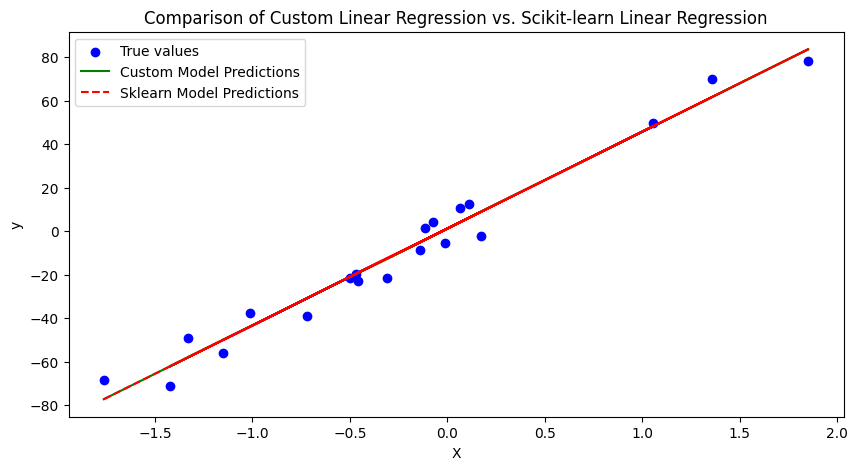

Custom Linear Regression R-squared: 0.9721
Sklearn Linear Regression R-squared: 0.9721


In [8]:

# Plotting the predictions
plt.figure(figsize=(10, 5))

# Plot data points
plt.scatter(X_test, y_test, color='blue', label="True values")

# Plot custom model predictions
plt.plot(X_test, y_pred_custom, color='green', label="Custom Model Predictions")

# Plot sklearn model predictions
plt.plot(X_test, y_pred_sklearn, color='red', linestyle='--', label="Sklearn Model Predictions")

plt.title("Comparison of Custom Linear Regression vs. Scikit-learn Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Print R-squared values
print(f"Custom Linear Regression R-squared: {r2_custom:.4f}")
print(f"Sklearn Linear Regression R-squared: {r2_sklearn:.4f}")


## Part 2 Multiple linear regression

### generate a synthetic dataset for multiple linear regression

In [10]:
X_multi, y_multi = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
print("Dimensions of X_multi:", X_multi.shape)
print("Dimensions of y_multi:", y_multi.shape)

Dimensions of X_multi: (100, 5)
Dimensions of y_multi: (100,)


In [11]:
### Custom Linear Regression for multiple features
custom_lr_multi = LinearRegression()
custom_lr_multi.fit(X_multi, y_multi)
y_pred_custom_multi = custom_lr_multi.predict(X_multi)
r2_custom_multi = custom_lr_multi.Rsquared(X_multi, y_multi)


In [12]:
### Scikit-learn Linear Regression for multiple features
sklearn_lr_multi = SklearnLinearRegression()
sklearn_lr_multi.fit(X_multi, y_multi)
y_pred_sklearn_multi = sklearn_lr_multi.predict(X_multi)
r2_sklearn_multi = r2_score(y_multi, y_pred_sklearn_multi)


Text(0.05, 0.9, 'R-squared: 0.9955')

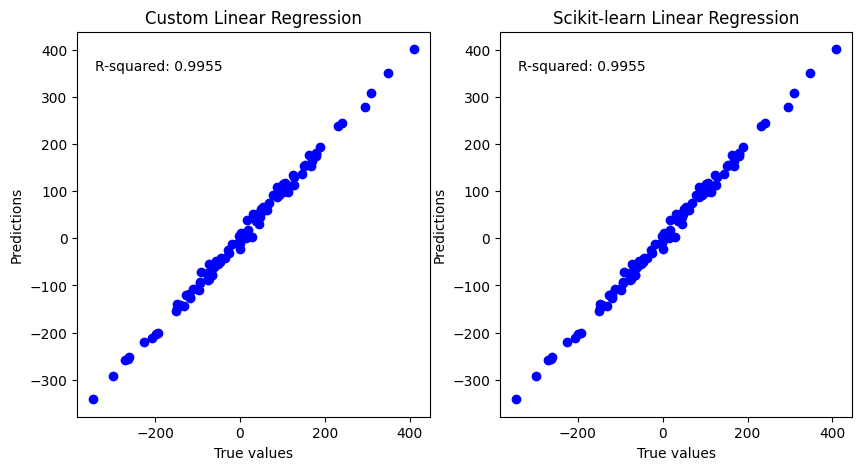

In [14]:
# Plot the predictions and ground truth values as a scatter plot for both models
plt.figure(figsize=(10, 5))
fig1 = plt.subplot(1, 2, 1)
fig1.scatter(y_multi, y_pred_custom_multi, color='blue')
fig1.set_title("Custom Linear Regression")
fig1.set_xlabel("True values")
fig1.set_ylabel("Predictions")
fig1.annotate(f"R-squared: {r2_custom_multi:.4f}", xy=(0.05, 0.9), xycoords='axes fraction')

fig2 = plt.subplot(1, 2, 2)
fig2.scatter(y_multi, y_pred_sklearn_multi, color='blue')
fig2.set_title("Scikit-learn Linear Regression")
fig2.set_xlabel("True values")
fig2.set_ylabel("Predictions")
fig2.annotate(f"R-squared: {r2_sklearn_multi:.4f}", xy=(0.05, 0.9), xycoords='axes fraction')
